# A. Objective:
A used car dealer in UK desires to put in place an automated mechanism to estimate the resale price of a used mercedes car basis the multiple data points on the car like age, miles run, transmission type etc. 

The learning task is to build a predictive model capable of doing the same with as less error as feasible. 

# B. Data Description:

Data Source : [Kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

The data has 13119 rows & 9 columns. All cars belong to Mercedes brand in UK.

**Feature Details** :

1. **model**: the model name of the car

2. **year**: the year of registration of car

3. **transmission**: the transsmission type of car - Semi-Automatic, Automatic, Manual, Other

4. **miles**: total miles that the car has run

5. **fuelType**: type of fuel that car runs on - Diesel, Petrol, Hybrid, Other

6. **tax**: the tax on car in UK pounds

7. **mpg**: miles run by car per gallon of fuel

8. **engineSize**: the engine size of car in litres

9. **price**: the resale price of car in UK pounds - TARGET VARIABLE

# C. Importing Required Libraries & data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
# importing the data
merc = pd.read_csv('merc.csv')

# D. Exploratory Data Analysis

### D1. Exploring first 5 rows of data
- **3 categorical features** --> 'model', 'transmission', 'fuelType'
- **6 numerical features** --> 'year', 'price', 'miles', 'tax', 'mpg'
- The target variable is continuous

In [3]:
merc.head()

,model,year,price,transmission,miles,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


### D2. Exploring shape of dataframe & column data types
- We note that the dataset has 9 columns and 13119 records
- Also it is seen that the categorical columns of 'model', 'transmission & 'fuelType' have object data type

In [4]:
merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
model           13119 non-null object
year            13119 non-null int64
price           13119 non-null int64
transmission    13119 non-null object
miles           13119 non-null int64
fuelType        13119 non-null object
tax             13119 non-null int64
mpg             13119 non-null float64
engineSize      13119 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


### D3. Checking for duplicates
There are 259 duplicate observations. For now, we drop them from the database. 

In [48]:
# dropping rows that have exactly same value for all features
merc.drop_duplicates(inplace=True)

# re-checking the dataframe's shape
merc.shape 

(12860, 9)

### D4. Checking for any missing values
There are no missing values in any column

In [7]:
# checking number of missing values in each column
merc.isna().sum()

model           0
year            0
price           0
transmission    0
miles           0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### D5. Replacing 'year' column by 'age' of car in year 2020 (the latest year in dataset)

In [8]:
print('Statistical summary of numerical features of all employees: \n')
merc.describe()

Statistical summary of numerical features of all employees: 



,year,price,miles,tax,mpg,engineSize
count,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000
mean,2017.267963,24636.426361,22169.588336,129.843701,55.197535,2.075381
std,2.226127,11874.220447,21077.039295,65.580514,15.181133,0.573434
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17309.750000,6494.000000,125.000000,45.600000,1.800000
50%,2018.000000,22299.000000,15448.500000,145.000000,56.500000,2.000000
75%,2019.000000,28971.250000,32000.000000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [49]:
# calculating car age
merc['age'] = 2020-merc['year']
merc.drop('year', axis=1, inplace=True)

### D6. Exploring statistical summary

In [10]:
merc.describe()

,price,miles,tax,mpg,engineSize,age
count,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000
mean,24636.426361,22169.588336,129.843701,55.197535,2.075381,2.732037
std,11874.220447,21077.039295,65.580514,15.181133,0.573434,2.226127
min,650.000000,1.000000,0.000000,1.100000,0.000000,0.000000
25%,17309.750000,6494.000000,125.000000,45.600000,1.800000,1.000000
50%,22299.000000,15448.500000,145.000000,56.500000,2.000000,2.000000
75%,28971.250000,32000.000000,145.000000,64.200000,2.100000,4.000000
max,159999.000000,259000.000000,580.000000,217.300000,6.200000,50.000000


**Observations :**

* **price** - The min and max values are far from nearest quartiles, indicating presence of extreme values.

* **miles** - Presence of extreme values and considerable skewness (as median closer to quatile Q1 & median < mean)

* **tax** - Presence of extreme values

* **mpg**- Min value is 1.1 which seems to be an error. Presence of extreme values.

* **engineSize** - Min value is 0.0 which seems to be an error. Presence of extreme values.

* **age** - Presence of extreme values.

**Addressing engine size=0**

In [11]:
df_temp = merc[merc['engineSize']==0]
df_temp

,model,price,transmission,miles,fuelType,tax,mpg,engineSize,age
9618,A Class,17500,Automatic,29712,Diesel,20,68.9,0.0,4
9619,A Class,20500,Automatic,13386,Petrol,145,53.3,0.0,2
9621,A Class,18000,Automatic,18347,Diesel,150,65.7,0.0,2
9650,GLA Class,18700,Other,30895,Other,125,56.5,0.0,4
9654,A Class,17800,Automatic,21913,Diesel,20,68.9,0.0,4
10675,SL CLASS,16500,Automatic,26955,Diesel,30,70.6,0.0,4
10710,A Class,17500,Automatic,19796,Diesel,145,74.3,0.0,2
10739,GLA Class,16000,Manual,34635,Diesel,30,64.2,0.0,3
10815,A Class,18000,Automatic,33282,Diesel,145,68.9,0.0,3
11183,E Class,22738,Automatic,24000,Diesel,150,61.4,0.0,2


In [50]:
# dropping these 12 records with engine size 0
merc = merc[merc['engineSize']!=0]
merc.shape

(12848, 9)

**Addressing mpg=1.1**

In [13]:
df_temp=merc[merc['mpg']==1.1]
df_temp

,model,price,transmission,miles,fuelType,tax,mpg,engineSize,age
2524,A Class,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3,0
6970,A Class,31500,Semi-Auto,1000,Hybrid,135,1.1,1.3,0
10366,A Class,33900,Automatic,345,Hybrid,140,1.1,1.3,0


In [51]:
# dropping these 3 records with mpg 1.1
merc = merc[merc['mpg']!=1.1]
merc.shape

(12845, 9)

### D7. Exploring distribution of records for each feature

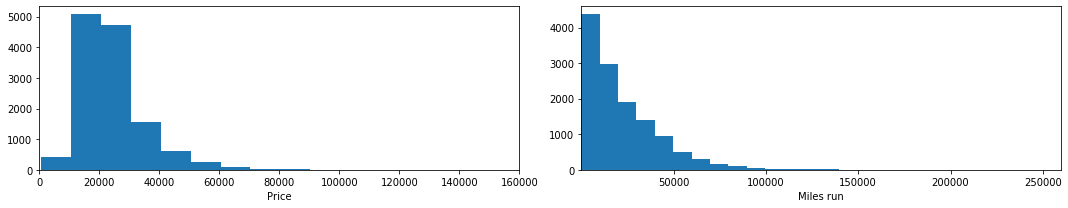

In [15]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches([15,3])
ax[0].hist(merc["price"], bins=16)
ax[1].hist(merc["miles"], bins=26)

ax[0].set_xlabel("Price")
ax[1].set_xlabel("Miles run")

ax[0].set_xlim([0,160000])
ax[1].set_xlim([1,260000])
plt.tight_layout()
plt.show()

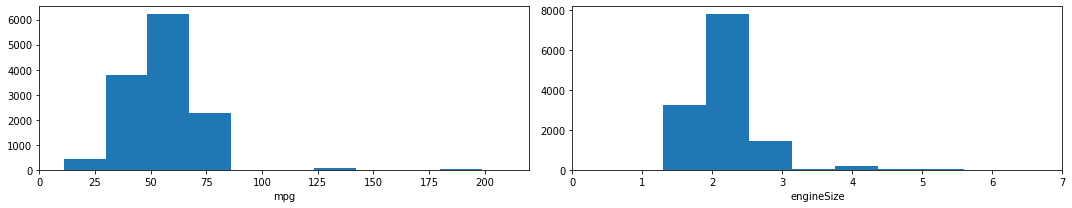

In [16]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches([15,3])
ax[0].hist(merc["mpg"], bins=11)
ax[1].hist(merc["engineSize"], bins=8)

ax[0].set_xlabel("mpg")
ax[1].set_xlabel("engineSize")

ax[0].set_xlim([0,220])
ax[1].set_xlim([0,7])
plt.tight_layout()
plt.show()

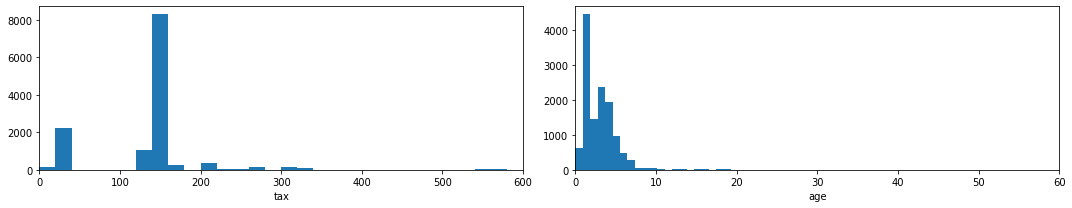

In [17]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches([15,3])
ax[0].hist(merc["tax"], bins=29)
ax[1].hist(merc["age"], bins=25)

ax[0].set_xlabel("tax")
ax[1].set_xlabel("age")

ax[0].set_xlim([0,600])
ax[1].set_xlim([0,60])
plt.tight_layout()
plt.show()

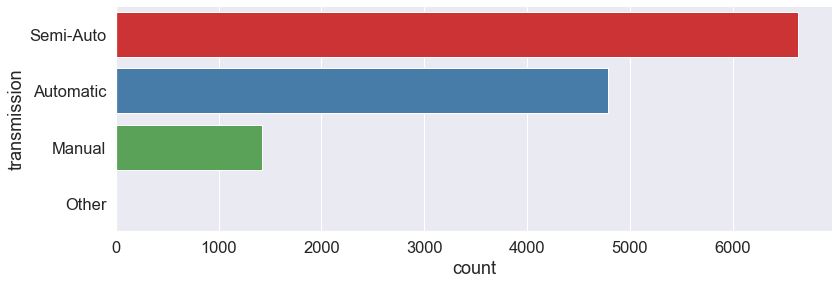

In [38]:
sns.set(font_scale = 1.5)


sns.catplot(y="transmission",data=merc,kind="count",
            order = ['Semi-Auto','Automatic','Manual', 'Other'],
            height=4, aspect=3,
           palette='Set1')
plt.show()

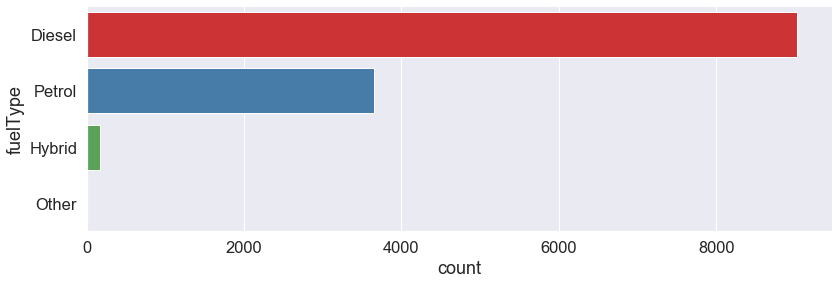

In [39]:
sns.catplot(y="fuelType",data=merc,kind="count",
            order = ['Diesel','Petrol','Hybrid', 'Other'],
            height=4, aspect=3,
           palette='Set1')

plt.show()

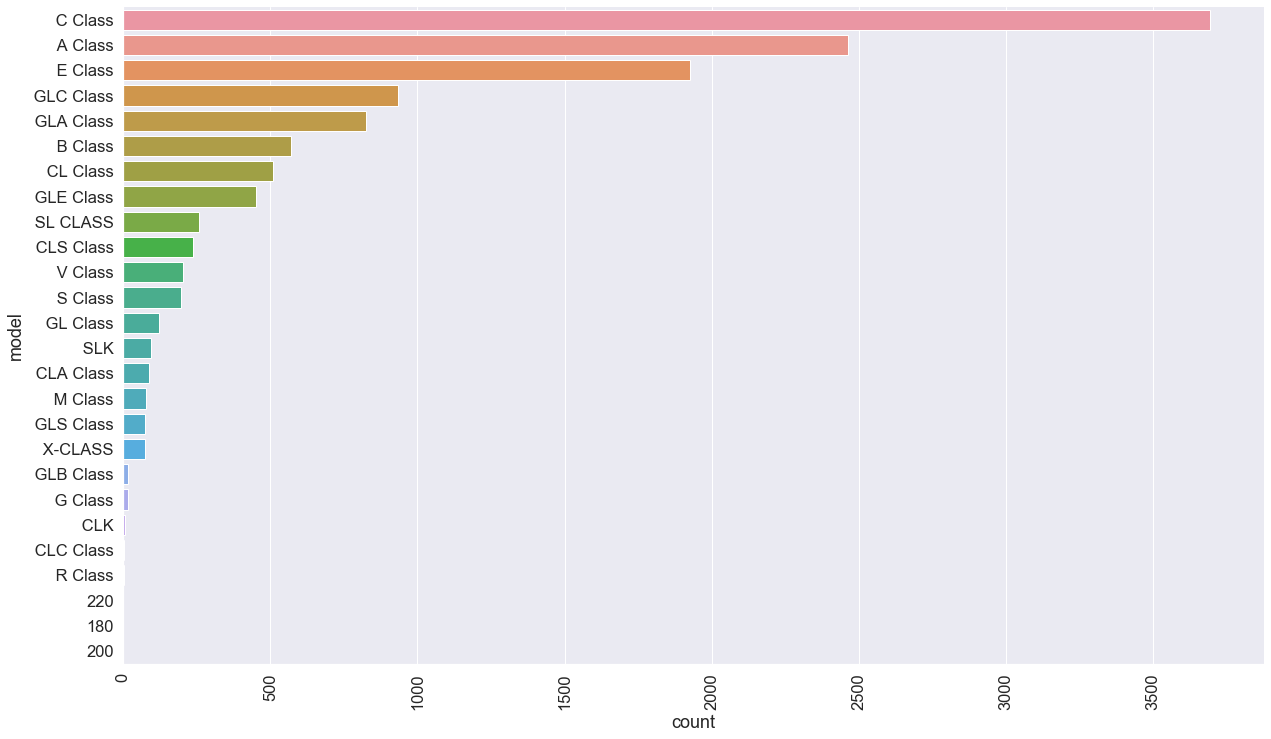

In [52]:
sns.catplot(y="model",data=merc,kind="count",order = merc['model'].value_counts().index, height=10, aspect=1.8)
plt.xticks(rotation=90)
plt.show()

### D8. Exploring variation of price with features

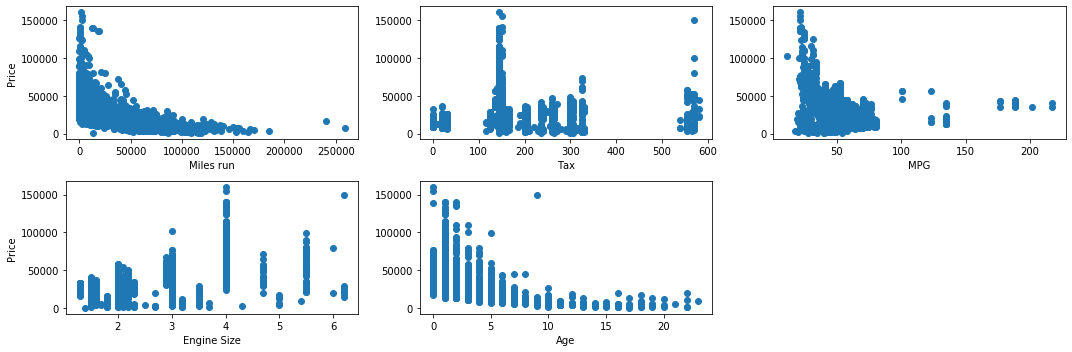

In [21]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches([15, 5])
ax[0,0].scatter(merc["miles"], merc['price'])
ax[0,1].scatter(merc["tax"], merc['price'])
ax[0,2].scatter(merc["mpg"], merc['price'])
ax[1,0].scatter(merc["engineSize"], merc['price'])
ax[1,1].scatter(merc["age"], merc['price'])

ax[0,0].set_ylabel("Price")
ax[1,0].set_ylabel("Price")

ax[0,0].set_xlabel("Miles run")
ax[0,1].set_xlabel("Tax")
ax[0,2].set_xlabel("MPG")
ax[1,0].set_xlabel("Engine Size")
ax[1,1].set_xlabel("Age")
fig.delaxes(ax[1,2])
plt.tight_layout()
plt.show()

We can see from the plots above that not all of the predictors have a perfect linear relationship with the target variable ('price' is the target variable and the rest are the predictor variables).

### D9. Creating dummy variables for categorical variables

In [53]:
merc_dummy = pd.get_dummies(merc)
merc_dummy.columns

Index(['price', 'miles', 'tax', 'mpg', 'engineSize', 'age', 'model_ A Class',
       'model_ B Class', 'model_ C Class', 'model_ CL Class',
       'model_ CLA Class', 'model_ CLC Class', 'model_ CLK',
       'model_ CLS Class', 'model_ E Class', 'model_ G Class',
       'model_ GL Class', 'model_ GLA Class', 'model_ GLB Class',
       'model_ GLC Class', 'model_ GLE Class', 'model_ GLS Class',
       'model_ M Class', 'model_ R Class', 'model_ S Class', 'model_ SL CLASS',
       'model_ SLK', 'model_ V Class', 'model_ X-CLASS', 'model_180',
       'model_200', 'model_220', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')

Dropping one sub-category of each of the 3 original categorical variables to avoid **dummy variable trap**   

In [54]:
merc_dummy.drop(['model_ B Class', 'transmission_Semi-Auto', 'fuelType_Petrol'], axis=1,inplace=True)
merc_dummy.shape

(12845, 37)

# E. Checking for multi-collinearity 

### E1. Checking pair-wise correlation between predictor variables

In [55]:
df_temp=merc.drop(['price','transmission','fuelType','model'],axis=1)
df_temp.corr()

,miles,tax,mpg,engineSize,age
miles,1.000000,-0.154356,0.201232,0.060432,0.750637
tax,-0.154356,1.000000,-0.517597,0.346459,-0.012221
mpg,0.201232,-0.517597,1.000000,-0.347705,0.094146
engineSize,0.060432,0.346459,-0.347705,1.000000,0.147577
age,0.750637,-0.012221,0.094146,0.147577,1.000000


**Observations**

- **miles & age** - moderate +ve correlation
- **tax & mpg** - moderate -ve correlation

Next, we explore the VIF values to better understand multi-collinearity


### E2. Checking VIF values to detect multi-collinearity

In [56]:
merc_num = merc_dummy.drop(['price'],axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(merc_num)

,variables,VIF
0,miles,5.424018
1,tax,7.180905
2,mpg,26.340422
3,engineSize,18.959434
4,age,6.980094
5,model_ A Class,4.749249
6,model_ C Class,6.760850
7,model_ CL Class,1.774754
8,model_ CLA Class,1.141263
9,model_ CLC Class,1.011257


In [57]:
merc_num_2 = merc_num.drop('mpg', axis=1)
calc_vif(merc_num_2)

,variables,VIF
0,miles,5.421281
1,tax,7.043657
2,engineSize,18.648611
3,age,6.978931
4,model_ A Class,3.167503
5,model_ C Class,4.997074
6,model_ CL Class,1.513918
7,model_ CLA Class,1.095140
8,model_ CLC Class,1.010610
9,model_ CLK,1.046381


In [58]:
merc_num_3=merc_num_2.drop('engineSize', axis=1)
calc_vif(merc_num_3)

,variables,VIF
0,miles,5.420745
1,tax,5.666363
2,age,6.818953
3,model_ A Class,2.576008
4,model_ C Class,3.289499
5,model_ CL Class,1.293085
6,model_ CLA Class,1.062131
7,model_ CLC Class,1.010584
8,model_ CLK,1.045098
9,model_ CLS Class,1.263303


**So for modelling purposes we will drop - mpg and engineSize**

# H. Preparing Data for Model Application

### H1. Removing the columns with high multi-collinearity found using VIF analysis

In [59]:
merc_dummy2=merc_dummy.drop(['mpg', 'engineSize'], axis=1)
merc_dummy2.shape

(12845, 35)

### H2. Splitting data in train & test sets

In [60]:
# splitting data into test and train set

X = merc_dummy2.drop('price',axis=1)
y = merc_dummy2['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

# I. Linear Reg Model

## I1. LR Model Run 1

In [62]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [63]:
# OLS Model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
LR_1 = est.fit()
print(LR_1.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     461.7
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:40:51   Log-Likelihood:                -99705.
No. Observations:                9633   AIC:                         1.995e+05
Df Residuals:                    9600   BIC:                         1.997e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    2.8

### RESIDUAL ANALYSIS - Checking Normal Distribution of residuals using Q-Q Plot

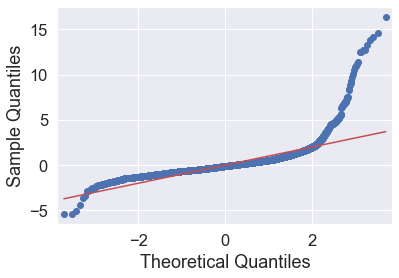

In [64]:
res = LR_1.resid # residuals

import statistics
std = statistics.stdev(res)

fig = sm.qqplot(res/std, line='s')
plt.show()

From the above figure, we see that points in middle lie to close to the 45-degree line with major deviations ends. We can say that distrbution of residuals is not Normal Distribution and has major deviation.

### RESIDUAL ANALYSIS - Plot of 'Residuals' vs 'Fitted Values' to check for Heteroscedasticity

In [65]:
Train_data = X_train.copy()
Train_data['price']=y_train

ypred = LR_1.predict(X2) # training set predictions

Train_data['pred_price_LR1']=ypred
Train_data['residual_LR1'] = res
Train_data['studentized_residual_LR1'] = res/std
Train_data['absolute_residual_LR1'] = abs(res)

In [66]:
Train_data.head(1)

,miles,tax,age,model_ A Class,model_ C Class,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,...,transmission_Manual,transmission_Other,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,price,pred_price_LR1,residual_LR1,studentized_residual_LR1,absolute_residual_LR1
1489,10839,145,3,1,0,0,0,0,0,0,...,0,0,0,0,0,15995,24699.91175,-8704.91175,-1.150474,8704.91175


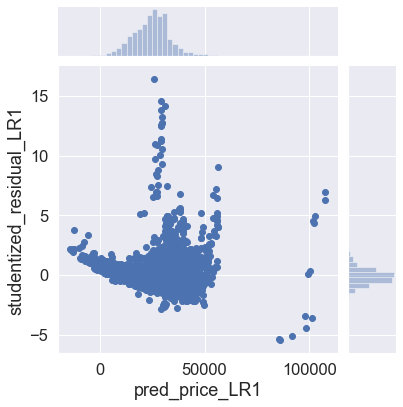

In [67]:
sns.jointplot(x='pred_price_LR1',y='studentized_residual_LR1',data=Train_data,kind='scatter')

### The above plot indicates 

- Presence of **HETEROSCEDASTICITY** and this needs to be addressed in order to further improve model performance.

- Presence of **OUTLIERS** (Studentized Residual values greater than 3 indicate outliers.)

## I2. Addressing outliers and heteroscedastcity observed above 

### OUTLIERS - Remove records where Studentized_Residual > 3

In [68]:
Train_data=Train_data[Train_data['studentized_residual_LR1']<=3]
Train_data['studentized_residual_LR1'].max()

2.9835787787532624

In [69]:
Train_data.shape

(9517, 39)

In [70]:
X_train.shape

(9633, 34)

9633-9517=116 outliers removed

### HETEROSCEDASTICITY - Taking log of dependent variable and then running OLS helps in dampening effect of Heteroscdasticity

In [71]:
import math
Train_data['log_price'] = Train_data['price'].apply(math.log)
Train_data.head(1)

,miles,tax,age,model_ A Class,model_ C Class,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,...,transmission_Other,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,price,pred_price_LR1,residual_LR1,studentized_residual_LR1,absolute_residual_LR1,log_price
1489,10839,145,3,1,0,0,0,0,0,0,...,0,0,0,0,15995,24699.91175,-8704.91175,-1.150474,8704.91175,9.680031


## I3. LR Model Run 2 - After addressing outliers & heteroscedasticity

In [72]:
X_train = Train_data.drop(['price','log_price','pred_price_LR1','residual_LR1','studentized_residual_LR1','absolute_residual_LR1'], axis=1)
y_train_log = Train_data['log_price']

In [73]:
# OLS model
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train_log, X2)
LR2 = est.fit()
print(LR2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1578.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:42:15   Log-Likelihood:                 3635.5
No. Observations:                9517   AIC:                            -7205.
Df Residuals:                    9484   BIC:                            -6969.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     10

### RESIDUAL ANALYSIS - Checking Normal Distribution of residuals using Q-Q Plot

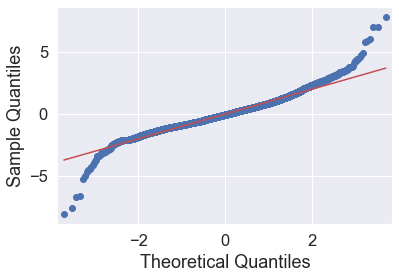

In [74]:
res = LR2.resid # residuals

import statistics
std = statistics.stdev(res)

fig = sm.qqplot(res/std, line='s')
plt.show()

The distribution of residuals is closer to normal distribution compared to last model, but is still not normally distributed 

### RESIDUAL ANALYSIS - Plot of 'Residuals' vs 'Fitted Values' to check for Heteroscedasticity

In [75]:
ypred = LR2.predict(X2) # training set predictions

Train_data['log_pred_price']=ypred
Train_data['act_pred_price_LR2']=np.exp(ypred)
Train_data['residual_lg'] = res
Train_data['studentized_residual_lg'] = res/std
Train_data['absolute_residual_lg'] = abs(res)

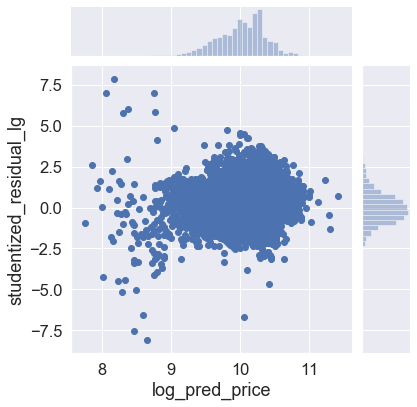

In [76]:
sns.jointplot(x='log_pred_price',y='studentized_residual_lg',data=Train_data,kind='scatter')

Here we see that taking Log(price) has dampened the heteroskedasticty. Above plot shows lesser extent of heteroscedasticity compared to earlier model.

## I4. LR Model Run 3 : After removing the 8 insignificant predictors 

In [45]:
Train_data.head(1)

,miles,tax,age,model_ A Class,model_ C Class,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,...,pred_price_LR1,residual_LR1,studentized_residual_LR1,absolute_residual_LR1,log_price,log_pred_price,act_pred_price_LR2,residual_lg,studentized_residual_lg,absolute_residual_lg
1489,10839,145,3,1,0,0,0,0,0,0,...,24699.91175,-8704.91175,-1.150474,8704.91175,9.680031,9.914394,20219.331608,-0.234363,-1.419069,0.234363


In [78]:
X_train_log = Train_data.drop(['price', 'log_price','log_pred_price','act_pred_price_LR2','residual_lg','studentized_residual_lg', 'absolute_residual_lg', 'pred_price_LR1', 'residual_LR1','studentized_residual_LR1', 'absolute_residual_LR1', 'model_ CLK','model_ R Class','model_180','model_200','transmission_Automatic','transmission_Other','fuelType_Other'], axis=1)
y_train_log = Train_data['log_price']

# OLS model
X2 = sm.add_constant(X_train_log)
est = sm.OLS(y_train_log, X2)
LR2 = est.fit()
print(LR2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1942.
Date:                Sat, 19 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:44:27   Log-Likelihood:                 3632.8
No. Observations:                9517   AIC:                            -7212.
Df Residuals:                    9490   BIC:                            -7018.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.1382    

In [79]:
# dropping insignificant columns from test set
from sklearn.metrics import mean_squared_error 
from math import sqrt

X_test_minimal = X_test.drop(['model_ CLK','model_ R Class','model_180','model_200','transmission_Automatic','transmission_Other','fuelType_Other'], axis=1)

In [80]:
# running the model on test dataset to and finding RMSE
X2 = sm.add_constant(X_test_minimal)
ypred = LR2.predict(X2)
ypred_actual = np.exp(ypred)

RMSE = sqrt(mean_squared_error(y_test,ypred_actual))
print('RMSE of the LR model is ', RMSE)

RMSE of the LR model is  6341.744678715268


### Next steps in Linear Regression 
Perform step-wise regression with the predictor variables left to find optimum number of features. This could also help in further reducing multi-collinearity.

# J. Decision Tree Regressor

Taking all features into consideration

In [49]:
# splitting data into test and train set

X = merc_dummy.drop('price',axis=1)
y = merc_dummy['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [50]:
# using GridSearchCV to find optimum depth parameters for decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor  as DTR 

params = {'max_depth': range(1,21)}

grid_search_cv = GridSearchCV(DTR(random_state=42), param_grid = params, cv=5)
grid_search_cv.fit(X_train, y_train)

DTR_best = grid_search_cv.best_estimator_
DTR_best

DecisionTreeRegressor(max_depth=13, random_state=42)

In [51]:
# RMSE on Test Set
pred = DTR_best.predict(X_test) #make prediction on test set
RMSE = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE of DTR model is ',RMSE)
print("R2 of DTR model: ", DTR_best.score(X_test, y_test))

RMSE of DTR model is  3240.6100104879374
R2 of DTR model:  0.9181377509435393


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

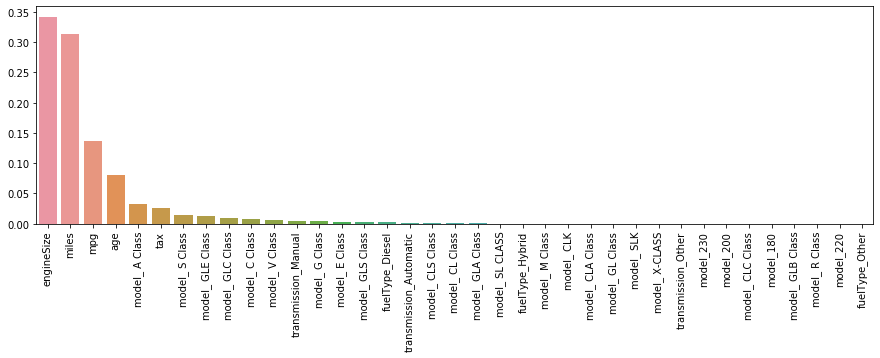

In [52]:
# Plotting the feature importance as given by DTR
feature_imp = pd.Series(DTR_best.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = feature_imp, x = feature_imp.index, ax=ax)
plt.xticks(rotation=90)

# K. Random Forest Model

Taking all predictor variables as Random Forest Model is robust to multi-collinearity

In [53]:
# using GridSearchCV to find optimum depth parameters for RFR
from sklearn.ensemble import RandomForestRegressor as RFR

# default n_estimators =100 which we are using here
params = {'max_depth': range(2,20), 'max_features': range(2,24,2)}

grid_search_cv = GridSearchCV(RFR(random_state=42), param_grid = params, cv=5)
grid_search_cv.fit(X_train, y_train)

RF = grid_search_cv.best_estimator_
RF

RandomForestRegressor(max_depth=18, max_features=22, random_state=42)

In [54]:
# error on Test Set
pred = RF.predict(X_test) #make prediction on test set
RMSE = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
print('RMSE of RF model is ', RMSE)
print("R2 of RF model: ", RF.score(X_test, y_test))

RMSE of RF model is  2448.047973698058
R2 of RF model:  0.9532835339607117


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

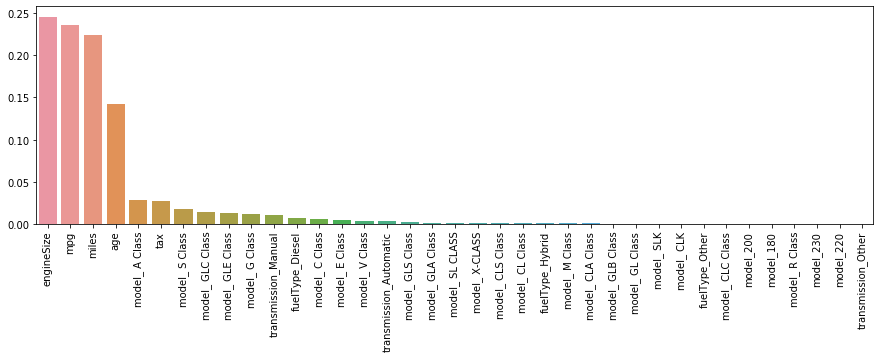

In [55]:
# checking feature importance score in random forest model

feature_imp = pd.Series(RF.feature_importances_,index=X_train.columns).sort_values(ascending=False)
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y = feature_imp, x = feature_imp.index, ax=ax)
plt.xticks(rotation=90)

# L. Model Selection :

In [56]:
model = ['LR', 'DTR', 'RFR']
RMSE = [6341.744, 3240.610, 2448.047]
R2 = [0.84,0.92,0.95]
model_outcome = pd.DataFrame({'model':model, 'RMSE':RMSE, 'R2' : R2})
model_outcome

,model,RMSE,R2
0,LR,6341.744,0.84
1,DTR,3240.610,0.92
2,RFR,2448.047,0.95


We are getting the lowest error by using the Random Forest Model, hence it should be selected out of all 3.